# **UAS**


## **Data Understanding**


### **Sumber dataset**

**" Menganalisa pola pengeluaran pelanggan grosir pada berbagai kategori produk "**

UCI Machine Learning Repository Citation:

https://archive.ics.uci.edu/dataset/292/wholesale+customers


### **Penjelasan Fitur dan Variabel**

Dataset ini digunakan untuk menganalisis pola pengeluaran pelanggan grosir pada berbagai kategori produk. Informasi pengeluaran ini dapat membantu dalam segmentasi pelanggan, strategi pemasaran, dan pengambilan keputusan bisnis yang lebih efektif.

Pengumpulan data pengeluaran tahunan pelanggan dilakukan langsung oleh distributor grosir. Data ini mencakup berbagai kategori produk yang dibeli oleh pelanggan, yang dapat mencerminkan kebiasaan belanja dan preferensi masing-masing segmen pelanggan.

Dataset ini telah dibersihkan dari nilai yang hilang dan setiap fitur numerik siap digunakan untuk analisis statistik maupun model pembelajaran mesin seperti klastering dan klasifikasi.

Fitur-fitur yang digunakan antara lain:

1. Channel

2. Region

3. Fresh

4. Milk

5. Grocery

6. Frozen

7. Detergents_Paper

8. Delicatessen

Terjemahan dan penjelasan fitur:

1. Channel
Saluran distribusi pelanggan (1 = Horeka [hotel, restoran, kafe], 2 = Retail)

2. Region
Wilayah pelanggan berada (1 = Lisbon, 2 = Oporto, 3 = Others)

3. Fresh
Pengeluaran tahunan untuk produk segar (Fresh products)

4. Milk
Pengeluaran tahunan untuk produk susu

5. Grocery
Pengeluaran tahunan untuk bahan kebutuhan pokok

6. Frozen
Pengeluaran tahunan untuk produk beku

7. Detergents_Paper
Pengeluaran tahunan untuk produk deterjen dan kertas

8. Delicatessen
Pengeluaran tahunan untuk produk makanan khusus (delicatessen)



### **Eksplorasi data**


* Jumlah Data : 440 baris (observasi)
* Jumlah fitur: 8 kolom
* Missing Value : tidak ada (semua kolom lengkap)
* Jumlah Outlier :

In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Wholesale Customers dari UCI ML Repo
wholesale_customers = fetch_ucirepo(id=292)

# Data (fitur dan target)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets  # Dataset ini tidak punya target eksplisit, biasanya None

# Metadata sederhana yang disesuaikan
metadata = {
    "name": "Wholesale customers",
    "source": wholesale_customers.metadata.get("source", "UCI ML Repo"),
    "instances": X.shape[0],
    "features": X.shape[1],
    "target": "Tidak ada target eksplisit",
    "feature_types": {
        col: ("Numerik" if pd.api.types.is_numeric_dtype(X[col]) else "Kategorikal")
        for col in X.columns
    }
}

# Tampilkan metadata custom
print("Metadata:")
for k, v in metadata.items():
    print(f"{k}: {v}")

# Tampilkan informasi tipe variabel dari dataset
print("\nVariable Information:")
print(wholesale_customers.variables)

# Ambil kolom numerik dari fitur
numeric_cols = X.select_dtypes(include='number').columns

# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Hitung jumlah outlier per kolom numerik
outlier_per_kolom = {}

print("\nJumlah Outlier per Kolom:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(X[col])
    outlier_count = outliers.sum()
    outlier_per_kolom[col] = outlier_count
    print(f"Kolom {col}: {outlier_count} outlier")

# Total keseluruhan outlier
total_outliers = sum(outlier_per_kolom.values())
print(f"\nTotal outlier di seluruh fitur numerik: {total_outliers}")


Metadata:
name: Wholesale customers
source: UCI ML Repo
instances: 440
features: 7
target: Tidak ada target eksplisit
feature_types: {'Channel': 'Numerik', 'Fresh': 'Numerik', 'Milk': 'Numerik', 'Grocery': 'Numerik', 'Frozen': 'Numerik', 'Detergents_Paper': 'Numerik', 'Delicassen': 'Numerik'}

Variable Information:
               name     role         type demographic description units  \
0           Channel  Feature  Categorical        None        None  None   
1            Region   Target  Categorical        None        None  None   
2             Fresh  Feature      Integer        None        None  None   
3              Milk  Feature      Integer        None        None  None   
4           Grocery  Feature      Integer        None        None  None   
5            Frozen  Feature      Integer        None        None  None   
6  Detergents_Paper  Feature      Integer        None        None  None   
7        Delicassen  Feature      Integer        None        None  None   

  missi

### **Visualisasi data**

In [22]:
%pip install ucimlrepo

In [23]:
import pandas as pd

# Load dataset lokal Wholesale Customers
df = pd.read_csv("Wholesale customers data.csv")

# Karena dataset Wholesale Customers tidak punya kolom target eksplisit,
# kita anggap semua kolom adalah fitur
X = df.copy()
y = None  # Tidak ada target

# Metadata sederhana untuk Wholesale Customers
metadata = {
    "name": "Wholesale Customers Dataset",
    "source": "UCI Machine Learning Repository",
    "instances": df.shape[0],
    "features": df.shape[1],
    "target": "Tidak ada target eksplisit",
    "feature_types": {
        "Channel": "Kategorikal (Diskret)",
        "Region": "Kategorikal (Diskret)",
        "Fresh": "Numerik (Kontinu)",
        "Milk": "Numerik (Kontinu)",
        "Grocery": "Numerik (Kontinu)",
        "Frozen": "Numerik (Kontinu)",
        "Detergents_Paper": "Numerik (Kontinu)",
        "Delicatessen": "Numerik (Kontinu)"
    }
}

# Informasi tipe variabel (dtype) per kolom
variables = df.dtypes

# Tampilkan metadata
print("Metadata:")
for k, v in metadata.items():
    print(f"{k}: {v}")

# Tampilkan tipe variabel
print("\nVariable Information:")
print(variables)


Metadata:
name: Wholesale Customers Dataset
source: UCI Machine Learning Repository
instances: 440
features: 8
target: Tidak ada target eksplisit
feature_types: {'Channel': 'Kategorikal (Diskret)', 'Region': 'Kategorikal (Diskret)', 'Fresh': 'Numerik (Kontinu)', 'Milk': 'Numerik (Kontinu)', 'Grocery': 'Numerik (Kontinu)', 'Frozen': 'Numerik (Kontinu)', 'Detergents_Paper': 'Numerik (Kontinu)', 'Delicatessen': 'Numerik (Kontinu)'}

Variable Information:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [24]:
import pandas as pd

# Load dataset lokal Wholesale Customers
df = pd.read_csv("Wholesale customers data.csv")

# Karena tidak ada target, dataframe sudah satu kesatuan
df_wholesale = df.copy()

# Tampilkan jumlah total baris dan isi dataset
print("Total baris dataset ini adalah =", len(df_wholesale))
print("Visualisasi dataset Wholesale Customers:")
print(df_wholesale.to_string(index=False))


Total baris dataset ini adalah = 440
Visualisasi dataset Wholesale Customers:
 Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
       2       3  12669  9656     7561     214              2674        1338
       2       3   7057  9810     9568    1762              3293        1776
       2       3   6353  8808     7684    2405              3516        7844
       1       3  13265  1196     4221    6404               507        1788
       2       3  22615  5410     7198    3915              1777        5185
       2       3   9413  8259     5126     666              1795        1451
       2       3  12126  3199     6975     480              3140         545
       2       3   7579  4956     9426    1669              3321        2566
       1       3   5963  3648     6192     425              1716         750
       2       3   6006 11093    18881    1159              7425        2098
       2       3   3366  5403    12974    4400              5977        174

In [25]:
# Simpan dataset Wholesale Customers ke file CSV
df_wholesale.to_csv('dataset_wholesale_customers.csv', index=False)

## **Preprocessing Data**

### **Transformasi data**

Mengubah menjadi kategori seperti Rendah, Sedang, dan Tinggi

In [26]:
import pandas as pd

# === 1. Load Dataset ===
df = pd.read_csv('Wholesale customers data.csv')

# === 2. Buat Kategori berdasarkan kolom 'Fresh' ===
def label_fresh_spending(value):
    if value < 10000:
        return 'Rendah'
    elif value < 30000:
        return 'Sedang'
    else:
        return 'Tinggi'

df['KategoriFresh'] = df['Fresh'].apply(label_fresh_spending)

# Cek hasil
print(df[['Fresh', 'KategoriFresh']].head())

   Fresh KategoriFresh
0  12669        Sedang
1   7057        Rendah
2   6353        Rendah
3  13265        Sedang
4  22615        Sedang


### **Normalisasi data**

Dataset dinormalisasi menggunakan StandarScaler dari library sklearn

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Misal sudah ada df yang berisi data Wholesale Customers dan kolom target KategoriFresh
# Encode fitur kategori 'Channel' dan 'Region' jadi angka
le_channel = LabelEncoder()
df['Channel'] = le_channel.fit_transform(df['Channel'])

le_region = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])

# Pisahkan fitur dan label
X = df.drop(columns=['KategoriFresh'])  # semua kolom kecuali label
y = df['KategoriFresh']                  # label klasifikasi

# Scaling fitur numerik dan hasil encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Split data**

Dataset dipisahkan menjadi 2 yaitu data testing 20% dan data traning 80%

In [28]:
from sklearn.model_selection import train_test_split

# Split data training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#### **Visualisasi data setelah preprocessing**

In [29]:
import pandas as pd

# Misal X dan y sudah ada (fitur dan label KategoriFresh)
# Gabungkan kembali fitur dan target
df_gabungan = pd.concat([pd.DataFrame(X, columns=df.drop(columns=['KategoriFresh']).columns), y.reset_index(drop=True)], axis=1)

# Tampilkan seluruh baris (jika dataset kecil)
print("Total baris dataset ini adalah =", len(df_gabungan))
print("Visualisasi dataset setelah penggabungan fitur dan target")
print(df_gabungan.to_string(index=False))



Total baris dataset ini adalah = 440
Visualisasi dataset setelah penggabungan fitur dan target
 Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen KategoriFresh
       1       2  12669  9656     7561     214              2674        1338        Sedang
       1       2   7057  9810     9568    1762              3293        1776        Rendah
       1       2   6353  8808     7684    2405              3516        7844        Rendah
       0       2  13265  1196     4221    6404               507        1788        Sedang
       1       2  22615  5410     7198    3915              1777        5185        Sedang
       1       2   9413  8259     5126     666              1795        1451        Rendah
       1       2  12126  3199     6975     480              3140         545        Sedang
       1       2   7579  4956     9426    1669              3321        2566        Rendah
       0       2   5963  3648     6192     425              1716         750        Re

In [30]:
# Simpan dataset gabungan fitur dan target ke file CSV
df_gabungan.to_csv('dataset_wholesale_gabungan.csv', index=False)


## **Modelling**

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### **Modelling Klasifikasi Wholesale Customers menggunakan Decision Tree**

Pemodelan ini bertujuan untuk mengklasifikasikan pelanggan grosir ke dalam tiga kategori pengeluaran produk segar, yaitu Rendah, Sedang, dan Tinggi, berdasarkan berbagai pengeluaran mereka pada produk lain seperti susu, bahan pokok, produk beku, dan lainnya. Informasi ini penting untuk segmentasi pelanggan dan strategi pemasaran yang tepat sasaran.

Model klasifikasi yang digunakan adalah Decision Tree Classifier, yaitu metode supervised learning yang bekerja dengan menyusun serangkaian aturan dalam bentuk struktur pohon bercabang. Setiap node dalam pohon merepresentasikan keputusan berdasarkan nilai suatu fitur, dan setiap daun menunjukkan hasil klasifikasi akhir.

### **1. Pembagian Dataset: Data Latih dan Data Uji**

Langkah awal dalam pemodelan adalah membagi data menjadi dua bagian:

* **Data Latih (Training Set):** Digunakan untuk melatih model.
* **Data Uji (Testing Set):** Digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

Dalam eksperimen ini digunakan pembagian 80% data latih dan 20% data uji, yang merupakan praktik umum dalam pembelajaran mesin. Rasio ini fleksibel dan dapat disesuaikan tergantung pada ukuran dan karakteristik dataset.

### **2. Pra-Pemrosesan Data**

Sebelum data digunakan untuk pelatihan model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan:

* Kolom target `Fresh` dikategorikan ke dalam tiga kelas:

  * `Fresh < 10000` → Rendah
  * `10000 ≤ Fresh < 30000` → Sedang
  * `Fresh ≥ 30000` → Tinggi

* Fitur kategori seperti `Channel` dan `Region` dikonversi menjadi bentuk numerik menggunakan Label Encoding agar dapat dikenali oleh model.

* Fitur-fitur numerik lainnya seperti `Milk`, `Grocery`, `Frozen`, dan `Detergents_Paper` tetap dalam bentuk aslinya karena Decision Tree dapat menangani nilai numerik tanpa perlu normalisasi.

### **3. Pelatihan Model Decision Tree**

Model Decision Tree dilatih menggunakan data latih. Proses pelatihan dilakukan dengan memecah data berdasarkan fitur-fitur yang menghasilkan pemisahan terbaik antar kelas (berdasarkan pengukuran seperti Gini Index).

Parameter yang digunakan dalam pemodelan ini antara lain:

* **Criterion:** `gini`, untuk menentukan kualitas pemisahan antar node.
* **Max Depth:** `5`, digunakan untuk membatasi kedalaman pohon agar model tidak overfitting terhadap data pelatihan.

Selama pelatihan, pohon akan membentuk struktur cabang yang merepresentasikan alur pengambilan keputusan dari fitur-fitur ke hasil klasifikasi.

### **4. Evaluasi Model**

Setelah proses pelatihan selesai, model diuji menggunakan data uji. Evaluasi performa model dilakukan dengan beberapa metrik:

* **Akurasi:** Persentase prediksi yang benar dari total data uji.
* **Classification Report:** Metrik lebih detail seperti precision, recall, dan F1-score untuk tiap kelas kategori pengeluaran.
* **Confusion Matrix:** Untuk melihat kesalahan klasifikasi yang terjadi antara kelas aktual dan prediksi.

Selain itu, struktur pohon keputusan dapat divisualisasikan untuk melihat fitur-fitur mana yang paling sering digunakan dalam pengambilan keputusan dan bagaimana model mengklasifikasikan data melalui jalur cabang.

### **5. Prediksi Kategori Pengeluaran**

Setelah evaluasi, model Decision Tree dapat digunakan untuk:

* Memprediksi kategori pengeluaran produk segar berdasarkan karakteristik pengeluaran pelanggan baru.
* Memberikan wawasan tentang fitur apa saja yang paling menentukan segmentasi pelanggan (misalnya pengeluaran susu atau bahan pokok).

### **Kesimpulan**

Decision Tree adalah metode klasifikasi yang sangat cocok untuk dataset seperti Wholesale Customers karena:

* Mampu menangani fitur numerik dan kategorikal tanpa proses normalisasi.
* Memberikan transparansi dalam pengambilan keputusan melalui visualisasi pohon.
* Cepat, mudah dipahami, dan cukup akurat untuk dataset berskala sedang.

Dengan memanfaatkan model ini, segmentasi pelanggan dapat dilakukan secara efisien dan praktis, sehingga membantu pengambilan keputusan pemasaran berbasis data.


Akurasi: 1.0

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       1.00      1.00      1.00        42
      Sedang       1.00      1.00      1.00        35
      Tinggi       1.00      1.00      1.00        11

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



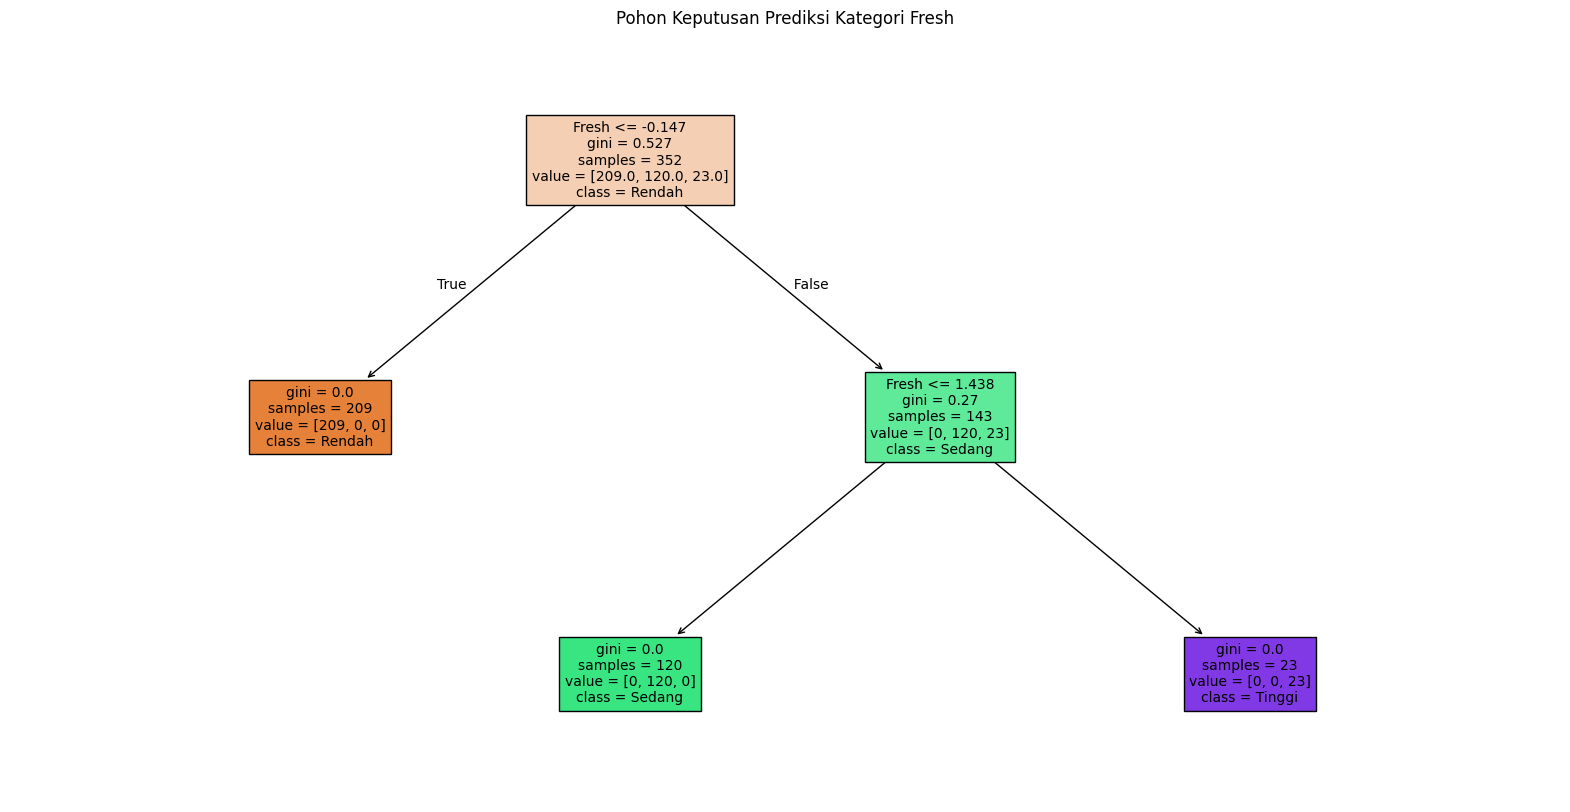

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Simpan nama kolom sebelum scaling (misal dari df asli tanpa kolom label)
feature_names = df.drop(columns=['KategoriFresh']).columns

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=[str(cls) for cls in clf.classes_],
    filled=True,
    fontsize=10
)
plt.title("Pohon Keputusan Prediksi Kategori Fresh")
plt.show()


### **Modelling Klasifikasi Wholesale Customers menggunakan Gaussian Naive Bayes**

Pada pemodelan kali ini, tujuan utama adalah untuk mengklasifikasikan pelanggan grosir ke dalam tiga kategori pengeluaran produk segar (Fresh), yaitu: Rendah, Sedang, dan Tinggi, berdasarkan pengeluaran mereka pada berbagai kategori produk lainnya seperti susu, bahan pokok, produk beku, dan lain sebagainya.

Untuk membangun model klasifikasi ini, digunakan metode *Gaussian Naive Bayes (GNB)*, yaitu salah satu algoritma pembelajaran mesin berbasis probabilistik yang sederhana namun efektif, terutama untuk data dengan fitur numerik yang distribusinya mendekati normal (Gaussian).

### **1. Pembagian Dataset menjadi Data Latih dan Data Uji**

Langkah pertama dalam proses pemodelan adalah membagi dataset menjadi dua bagian utama:

* *Data Latih (Training Set):* digunakan untuk melatih model.
* *Data Uji (Testing Set):* digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

Dalam pemodelan ini, digunakan rasio *80% data latih dan 20% data uji*, yang merupakan pembagian umum dalam praktik pembelajaran mesin. Namun, rasio ini bersifat fleksibel dan dapat disesuaikan tergantung kebutuhan serta jumlah data yang tersedia.

### **2. Menghitung Probabilitas Awal (Prior Probability)**

Setelah pembagian data, langkah selanjutnya adalah menghitung probabilitas awal (prior) untuk masing-masing kelas kategori pengeluaran (Rendah, Sedang, Tinggi). Prior ini dihitung dengan:

* Menghitung jumlah sampel pada masing-masing kelas di data latih.
* Membagi jumlah tersebut dengan total sampel data latih.

Nilai prior ini mencerminkan kemungkinan suatu data termasuk ke dalam suatu kelas tanpa mempertimbangkan fitur-fitur lainnya.

### **3. Menghitung Rata-rata dan Standar Deviasi Tiap Fitur**

Untuk setiap kelas kategori pengeluaran, dihitung nilai rata-rata (mean) dan standar deviasi (standard deviation) dari setiap fitur numerik seperti pengeluaran susu, grocery, frozen food, detergents, dan delicatessen. Langkah ini penting karena Gaussian Naive Bayes mengasumsikan bahwa nilai-nilai fitur mengikuti distribusi normal untuk setiap kelas target.

### **4. Menghitung Distribusi Gaussian**

Selanjutnya, digunakan rumus distribusi Gaussian untuk menghitung probabilitas bahwa suatu nilai fitur berasal dari kelas tertentu:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Di mana:

* \$x\$ adalah nilai fitur input,
* \$\mu\$ adalah rata-rata fitur untuk kelas tertentu,
* \$\sigma\$ adalah standar deviasi fitur untuk kelas tersebut.

### **5. Menghitung Probabilitas Posterior**

Dengan probabilitas Gaussian yang telah dihitung untuk setiap fitur, probabilitas posterior untuk masing-masing kelas dihitung dengan mengalikan semua probabilitas fitur (asumsi independensi antar fitur) dan dikalikan dengan prior dari kelas tersebut:

$$
P(C_i|x) \propto P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Hasil ini memberikan gambaran tentang seberapa besar kemungkinan sebuah data termasuk ke dalam kelas tertentu berdasarkan seluruh fitur yang dimiliki.

### **6. Menentukan Prediksi Kelas**

Langkah terakhir dalam proses klasifikasi adalah memilih kelas dengan nilai probabilitas posterior tertinggi sebagai hasil prediksi untuk data tersebut. Dengan kata lain, model memilih kategori pengeluaran produk segar yang paling mungkin berdasarkan pola data latih.

Model Gaussian Naive Bayes yang dibangun dalam studi ini menunjukkan bagaimana pendekatan probabilistik dapat digunakan untuk mengklasifikasikan pelanggan grosir berdasarkan pola pengeluaran mereka. Meskipun GNB mengasumsikan independensi antar fitur (yang sering kali tidak sepenuhnya benar dalam praktik), pendekatan ini tetap berguna sebagai baseline model yang cepat, efisien, dan mudah diinterpretasikan dalam konteks segmentasi pelanggan berbasis data.

Akurasi: 0.8522727272727273

=== Classification Report ===
              precision    recall  f1-score   support

      Rendah       0.85      0.95      0.90        42
      Sedang       0.87      0.77      0.82        35
      Tinggi       0.80      0.73      0.76        11

    accuracy                           0.85        88
   macro avg       0.84      0.82      0.83        88
weighted avg       0.85      0.85      0.85        88



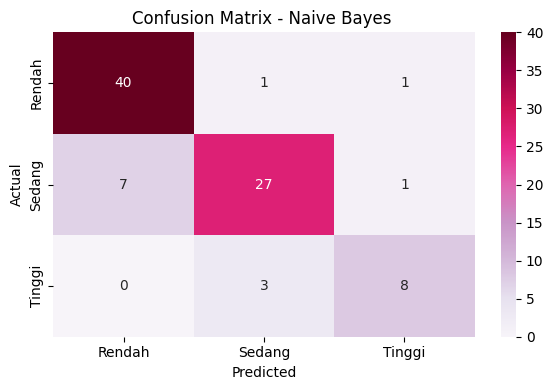

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Misal X_train, X_test, y_train, y_test sudah ada (dari dataset Wholesale dengan label KategoriFresh)

# === 7. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 8. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=gnb.classes_, yticklabels=gnb.classes_,
    cmap='PuRd'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes ")
plt.tight_layout()
plt.show()



### **Modelling Klasifikasi Dataset Wholesale Customers menggunakan K-Nearest Neighbor (K-NN)**

Model K-Nearest Neighbors (KNN) digunakan dalam penelitian ini untuk memprediksi kategori pengeluaran produk segar (`Fresh`) pelanggan grosir menjadi tiga kelas, yaitu Rendah, Sedang, dan Tinggi, berdasarkan berbagai pengeluaran pada kategori produk lain seperti susu, bahan pokok, produk beku, dan lainnya. KNN merupakan metode pembelajaran berbasis instance (*instance-based learning*), yang melakukan klasifikasi berdasarkan kemiripan dengan data latih yang telah disimpan. Artinya, KNN tidak membentuk fungsi atau aturan eksplisit, tetapi mengandalkan pencarian tetangga terdekat untuk menentukan kelas dari data uji.

Sebelum proses pelatihan dilakukan, dataset dibagi menjadi dua bagian: 80% digunakan sebagai data latih dan 20% sebagai data uji. Pembagian ini merupakan praktik umum dalam supervised learning untuk memastikan bahwa model dapat diuji pada data yang tidak pernah dilihat sebelumnya, sehingga hasil evaluasinya lebih objektif.

Tahapan pra-pemrosesan dilakukan agar model KNN dapat bekerja secara optimal. Pertama, kolom target `Fresh` yang semula berupa data numerik kontinu dikonversi menjadi tiga kelas menggunakan metode *binning*, yaitu `Rendah`, `Sedang`, dan `Tinggi`, berdasarkan pembagian distribusi data. Selanjutnya, beberapa fitur kategorikal seperti `Channel` dan `Region` dikonversi menjadi data numerik menggunakan teknik Label Encoding, karena algoritma KNN hanya dapat bekerja dengan data numerik. Terakhir, dilakukan normalisasi terhadap seluruh fitur numerik menggunakan StandardScaler. Langkah ini penting karena KNN sangat sensitif terhadap skala data—fitur dengan nilai besar dapat mendominasi perhitungan jarak jika tidak dinormalisasi terlebih dahulu.

Secara konsep, KNN bekerja dengan menghitung jarak (umumnya Euclidean) antara data uji dan semua data latih. Setelah jarak dihitung, algoritma akan mengambil sejumlah tetangga terdekat sebanyak nilai *k* yang ditentukan (misalnya 5). Prediksi kemudian dilakukan berdasarkan voting mayoritas dari kelas yang dimiliki oleh tetangga-tetangga tersebut. Jika sebagian besar dari tetangga tersebut termasuk dalam kelas "Tinggi", maka prediksi untuk data uji juga akan menjadi "Tinggi".

Model KNN kemudian dievaluasi menggunakan beberapa metrik penting, seperti akurasi (jumlah prediksi benar dibanding total prediksi), classification report yang mencakup precision, recall, dan F1-score untuk setiap kelas, serta confusion matrix yang memberikan gambaran detail mengenai distribusi hasil prediksi benar dan salah pada tiap kelas. Selain itu, pemilihan nilai *k* juga dapat memengaruhi performa model, sehingga eksperimen dengan nilai-nilai *k* yang berbeda (misalnya 3, 5, atau 7) sangat dianjurkan untuk mendapatkan hasil terbaik.

Model K-Nearest Neighbors (KNN) terbukti dapat digunakan secara efektif untuk mengklasifikasikan kategori pengeluaran produk segar berdasarkan berbagai fitur pengeluaran lainnya dalam dataset. Dengan pendekatan berbasis kemiripan antar data, KNN mampu memanfaatkan informasi dari data historis untuk memprediksi kelas pengeluaran baru secara intuitif dan mudah dipahami. Selama data telah melalui tahapan pra-pemrosesan yang tepat, seperti encoding dan normalisasi, model ini dapat memberikan hasil yang andal dan konsisten. Keunggulan KNN terletak pada kesederhanaannya serta fleksibilitasnya dalam menangani berbagai jenis data, menjadikannya solusi yang relevan dalam konteks segmentasi pelanggan berbasis data untuk mendukung pengambilan keputusan bisnis secara cepat dan akurat.

Akurasi: 0.8181818181818182

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       0.76      1.00      0.87        42
      Sedang       0.88      0.63      0.73        35
      Tinggi       1.00      0.73      0.84        11

    accuracy                           0.82        88
   macro avg       0.88      0.79      0.81        88
weighted avg       0.84      0.82      0.81        88



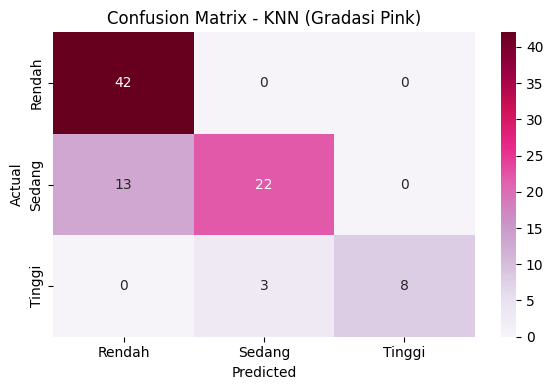

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Dataset ===
df = pd.read_csv('Wholesale customers data.csv')

# === 2. Buat kategori target dari kolom 'Fresh' ===
def label_fresh_spending(value):
    if value < 10000:
        return 'Rendah'
    elif value < 30000:
        return 'Sedang'
    else:
        return 'Tinggi'

df['KategoriFresh'] = df['Fresh'].apply(label_fresh_spending)

# === 3. Encode kolom kategorikal 'Channel' dan 'Region' ===
le_channel = LabelEncoder()
df['Channel'] = le_channel.fit_transform(df['Channel'])

le_region = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])

# === 4. Pisahkan fitur dan target ===
X = df.drop(columns=['KategoriFresh'])
y = df['KategoriFresh']

# === 5. Split data training dan testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 6. Normalisasi fitur numerik ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 7. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# === 8. Prediksi dan evaluasi ===
y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm_df = pd.DataFrame(cm, index=knn.classes_, columns=knn.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='PuRd', fmt='d')  # Gradasi warna pink
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Gradasi Pink)")
plt.tight_layout()
plt.show()

## **Evaluasi Data**

Dari dataset Wholesale Customers diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 100%
* Gaussian Naive Bayes = 85,22%
* K-Nearest Neighbor = 81,81%

Dari ketiga model diatas dapat disimpulkan bahwa Decision Tree memiliki akurasi tertinggi yaitu 100%.

## **Deployment**

Dari ketiga model, saya memilih model terbaik adalah Decission Tree, yang memiliki akurasi tertinggi yaitu 100%

### **Menyimpan model**

In [ ]:
import joblib

# Simpan model Decision Tree
joblib.dump(clf, 'model_decision_tree.pkl')

# Simpan scaler (StandardScaler)
joblib.dump(scaler, 'scaler.pkl')

print("Model Decision Tree dan scaler berhasil disimpan.")

* Install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.
* membuat file berekstensi .py, misal prediksiWholesaleCustomers.py.
* didalam prediksiWholesaleCustomers.py saya panggil model yang telah disimpan.
* setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.
berikut source code:
https://github.com/callistanovia/UAS.git

Berikut link Web:
https://prediksiwholesalecustomers.streamlit.app/


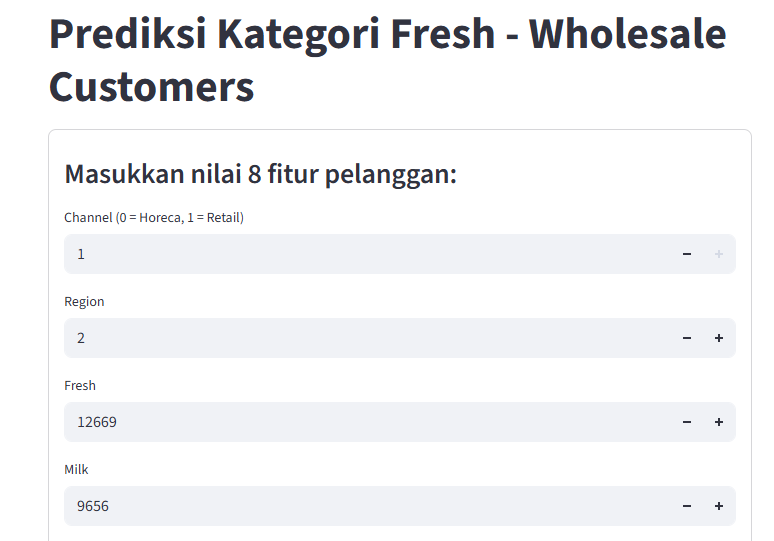

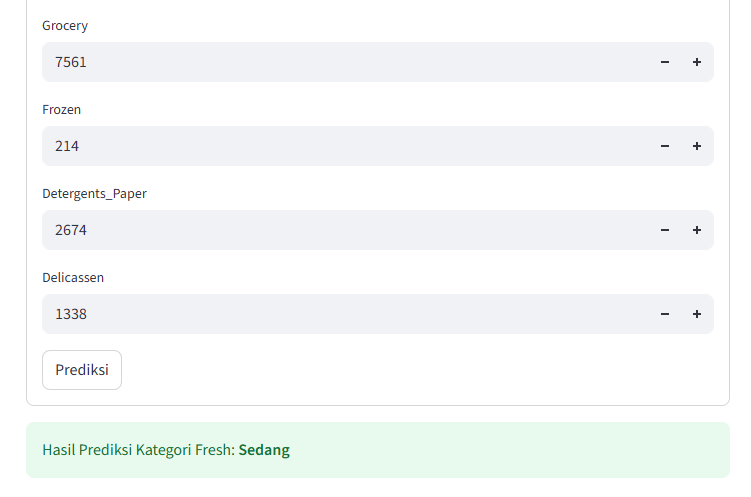